In [1]:
import pandas as pd
df = pd.read_csv('../input/train.csv')
data = df.drop('ID', axis=1)
data.iloc[:,1:] = data.iloc[:,1:].applymap(lambda x : 1 if x!='WT' else 0)
data

/var/folders/91/x1jkjm3549s21y3h3k_k56q80000gn/T/ipykernel_95643/3972006742.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data.iloc[:,1:] = data.iloc[:,1:].applymap(lambda x : 1 if x!='WT' else 0)


,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,KIPAN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,SARC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SKCM,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,KIRC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,GBMLGG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,LUAD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6197,LGG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6198,COAD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6199,TGCT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:

df_lda = data.drop(['SUBCLASS'], axis=1)
x_lda = df_lda
x_lda

,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y_lda = data['SUBCLASS']
y_lda.values

array(['KIPAN', 'SARC', 'SKCM', ..., 'COAD', 'TGCT', 'SKCM'], dtype=object)

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
x_r2 = lda.fit(x_lda,y_lda).transform(x_lda)

In [13]:
lda.explained_variance_ratio_


array([0.12782398, 0.09256106])

In [14]:
x_r3 = pd.DataFrame(data=x_r2)
x_r3['y']=y_lda
x_r3

,0,1,y
0,1.442718,0.300725,KIPAN
1,-2.268471,-0.208496,SARC
2,2.550535,13.479896,SKCM
3,-0.553724,1.401215,KIRC
4,-1.707686,0.312915,GBMLGG
...,...,...,...
6196,0.323958,0.529378,LUAD
6197,-1.489543,0.552944,LGG
6198,-1.630950,-0.189425,COAD
6199,-0.348759,0.387003,TGCT


<Axes: xlabel='0', ylabel='1'>

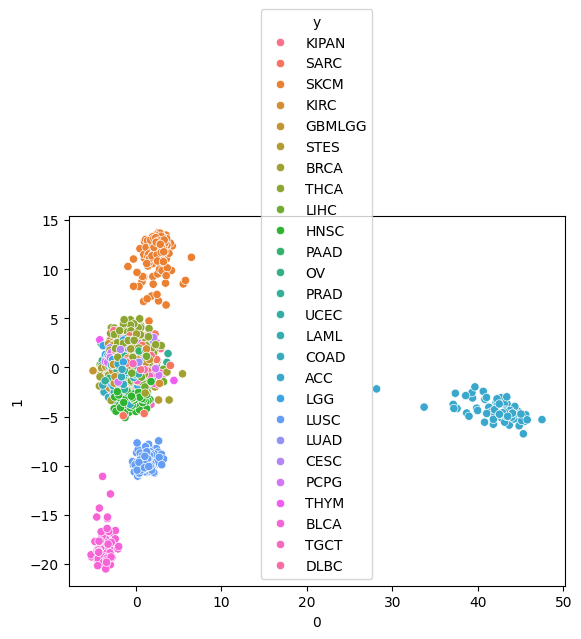

In [15]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=0,y=1,hue = 'y', data=x_r3)

In [ ]:
#SKCM, LUSC, BLCA, ACC

In [16]:
df_test = pd.read_csv('../input/test.csv')

In [17]:
df_test = df_test.drop('ID', axis=1)


In [18]:
df_test = df_test.applymap(lambda x : 0 if x=='WT' else 1)

/var/folders/91/x1jkjm3549s21y3h3k_k56q80000gn/T/ipykernel_95643/1475911852.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_test = df_test.applymap(lambda x : 0 if x=='WT' else 1)


In [19]:
res_lda = lda.predict(df_test)


In [20]:

df_test1 = pd.read_csv('../input/test.csv')
res_lda_df = pd.DataFrame ({'ID' : df_test1['ID'], 'SUBCLASS' : res_lda})
res_lda_df


,ID,SUBCLASS
0,TEST_0000,DLBC
1,TEST_0001,TGCT
2,TEST_0002,KIPAN
3,TEST_0003,LGG
4,TEST_0004,LUAD
...,...,...
2541,TEST_2541,BLCA
2542,TEST_2542,OV
2543,TEST_2543,PCPG
2544,TEST_2544,LAML


In [21]:
res_lda_df

,ID,SUBCLASS
0,TEST_0000,DLBC
1,TEST_0001,TGCT
2,TEST_0002,KIPAN
3,TEST_0003,LGG
4,TEST_0004,LUAD
...,...,...
2541,TEST_2541,BLCA
2542,TEST_2542,OV
2543,TEST_2543,PCPG
2544,TEST_2544,LAML


In [23]:
res_lda_df.SUBCLASS.value_counts()

SUBCLASS
COAD      247
BRCA      209
KIPAN     140
TGCT      131
GBMLGG    106
KIRC      105
PRAD      102
PAAD       97
OV         97
LIHC       97
PCPG       97
THCA       94
LUAD       91
CESC       90
SARC       90
BLCA       87
STES       86
UCEC       81
HNSC       81
SKCM       80
LGG        74
THYM       63
ACC        61
LUSC       56
LAML       48
DLBC       36
Name: count, dtype: int64

In [69]:
previous_rdf = 'res-COADplus-01.csv'

In [70]:
previous_df = pd.read_csv(previous_rdf)
previous_df['SUBCLASS'].value_counts()

SUBCLASS
COAD      1038
BRCA       542
KIPAN      171
GBMLGG     124
OV         100
STES        80
THCA        75
KIRC        68
SKCM        52
UCEC        47
LGG         43
LAML        26
HNSC        25
PRAD        23
LIHC        19
SARC        18
PCPG        18
TGCT        16
LUAD        15
CESC        13
ACC         11
LUSC         6
DLBC         5
PAAD         5
BLCA         4
THYM         2
Name: count, dtype: int64

In [53]:
index_to_change = res_lda_df[res_lda_df['SUBCLASS'] == 'LUSC'].index
previous_df.loc[index_to_change, 'SUBCLASS'] =res_lda_df.loc[index_to_change, 'SUBCLASS'] 

index_to_change = res_lda_df[res_lda_df['SUBCLASS'] == 'ACC'].index
previous_df.loc[index_to_change, 'SUBCLASS'] =res_lda_df.loc[index_to_change, 'SUBCLASS'] 

index_to_change = res_lda_df[res_lda_df['SUBCLASS'] == 'SKCM'].index
previous_df.loc[index_to_change, 'SUBCLASS'] =res_lda_df.loc[index_to_change, 'SUBCLASS'] 

index_to_change = res_lda_df[res_lda_df['SUBCLASS'] == 'BLCA'].index
previous_df.loc[index_to_change, 'SUBCLASS'] =res_lda_df.loc[index_to_change, 'SUBCLASS'] 


In [54]:
previous_df['SUBCLASS'].value_counts()

SUBCLASS
BRCA      856
KIPAN     260
STES      161
GBMLGG    151
SKCM      135
BLCA      101
KIRC       80
UCEC       80
THCA       77
LUSC       73
ACC        66
LGG        65
TGCT       55
OV         53
LAML       49
SARC       43
CESC       40
LIHC       36
LUAD       35
PRAD       35
HNSC       34
PAAD       31
PCPG       21
DLBC        5
THYM        4
Name: count, dtype: int64

In [63]:
empty_lines =  [ 15, 20, 21, 25, 28, 31, 34, 38, 39, 48, 52, 65, 68,76
,84,96,98,99,105,107,108,109,114,129,157,158,171,172
,197,210,216,230,240,248,258,268,280,290,292,299,300,304
,308,309,312,313,317,330,346,348,349,353,354,356,362,364
,368,385,400,403,414,419,421,423,425,426,427,429,434,436
,453,457,460,464,465,466,468,470,487,488,502,509,510,514
,526,527,530,531,532,543,554,555,567,569,570,575,580,581
,584,587,591,596,597,601,606,615,620,624,628,629,630,631
,633,634,640,651,653,658,663,665,667,671,675,678,682,685
,688,697,704,717,725,734,744,747,751,753,756,760,764,766
,768,773,774,775,777,778,779,792,795,797,799,801,807,808
,816,818,829,839,847,859,861,862,863,867,870,874,882,888
,892,908,916,918,919,928,933,937,939,946,948,949,959,963
,966,969,973,977,980,983,984,1000,1005,1010,1020,1027,1040,1041
,1043,1050,1051,1052,1054,1062,1068,1070,1079,1080,1087,1094,1097,1103
,1108,1109,1119,1124,1132,1133,1142,1148,1151,1153,1156,1161,1164,1166
,1173,1178,1181,1187,1195,1198,1203,1206,1210,1212,1223,1224,1245,1247
,1253,1274,1277,1280,1288,1289,1291,1298,1316,1317,1324,1339,1343,1345
,1349,1351,1356,1357,1368,1373,1389,1393,1407,1409,1417,1427,1431,1439
,1446,1448,1450,1451,1455,1458,1463,1481,1491,1493,1495,1498,1505,1510
,1522,1525,1529,1530,1537,1546,1547,1548,1550,1553,1570,1576,1582,1589
,1591,1593,1605,1607,1608,1619,1629,1636,1637,1643,1652,1672,1688,1689
,1691,1699,1705,1719,1720,1721,1726,1739,1746,1765,1771,1782,1787,1792
,1796,1800,1803,1814,1823,1837,1842,1848,1852,1870,1877,1878,1887,1888
,1897,1907,1916,1917,1923,1928,1938,1944,1956,1964,1966,1967,1991,1996
,2011,2019,2020,2021,2025,2026,2034,2036,2053,2054,2057,2067,2070,2075
,2076,2077,2078,2094,2103,2105,2108,2110,2123,2133,2138,2145,2148,2151
,2154,2160,2172,2180,2194,2195,2209,2228,2231,2237,2259,2266,2269,2272
,2283,2285,2289,2290,2303,2304,2305,2316,2318,2321,2323,2329,2330,2331
,2339,2345,2349,2354,2360,2361,2366,2376,2380,2387,2388,2391,2413,2415
,2416,2417,2420,2433,2435,2436,2441,2444,2445,2450,2454,2456,2461,2462
,2475,2485,2488,2493,2500,2505,2514,2516,2519,2524,2525,2527,2528,2531
,2537,2541 ]


In [76]:
cnt = 0
for t in empty_lines : 
    #print(t, df_test.iloc[t].apply(lambda x : 1 if x!='WT' else 0).agg(sum))
    if previous_df['SUBCLASS'][t]!='COAD':
        print(previous_df['SUBCLASS'][t])
        cnt +=1
#previous_df.to_csv('./res_sub_result/res-previous-lda-COAD.csv',index = False)
print(cnt)


STES
HNSC
BRCA
BRCA
KIPAN
KIRC
SARC
SARC
BRCA
BRCA
TGCT
OV
PRAD
BRCA
HNSC
LIHC
ACC
17


In [71]:
previous_df['SUBCLASS'].value_counts()

SUBCLASS
COAD      1038
BRCA       542
KIPAN      171
GBMLGG     124
OV         100
STES        80
THCA        75
KIRC        68
SKCM        52
UCEC        47
LGG         43
LAML        26
HNSC        25
PRAD        23
LIHC        19
SARC        18
PCPG        18
TGCT        16
LUAD        15
CESC        13
ACC         11
LUSC         6
DLBC         5
PAAD         5
BLCA         4
THYM         2
Name: count, dtype: int64

In [72]:
#zerosl = list(df_test[(df_test_2 == 0).all(axis=1)].index)
zerosl = [17, 180, 187, 214, 219, 294, 374, 446, 450, 545, 676, 696, 787, 855, 979, 1055, 1249, 1542, 1770, 1785, 1832, 1866, 1965, 2046, 2059, 2118, 2132, 2153, 2340, 2412, 2481]

previous_df.loc[zerosl, 'SUBCLASS'] = 'THYM'

In [73]:
previous_df['SUBCLASS'].value_counts()

SUBCLASS
COAD      1038
BRCA       511
KIPAN      171
GBMLGG     124
OV         100
STES        80
THCA        75
KIRC        68
SKCM        52
UCEC        47
LGG         43
THYM        33
LAML        26
HNSC        25
PRAD        23
LIHC        19
SARC        18
PCPG        18
TGCT        16
LUAD        15
CESC        13
ACC         11
LUSC         6
DLBC         5
PAAD         5
BLCA         4
Name: count, dtype: int64

In [74]:
previous_df.to_csv('../res-COAD-p02.csv',index = False)